In [22]:
%matplotlib inline

# PYTORCH:NN

仍然是同样的回归问题。这次我们用torch.nn来实现。

PyTorch的自动求导让定义计算图和获取梯度变得很容易，但是对于复杂的网络来说，这样的定义方法有些过于底层了；这就是nn包解决的问题。nn包定义了一组模块，它们可以看作是神经网络的layer，能够获得一个input产生一个output，并具有可优化的参数。

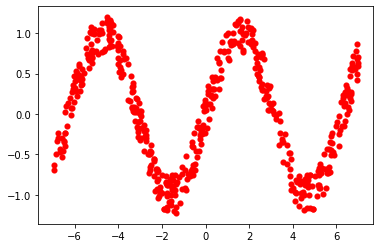

In [23]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 

# N是batch_size； D_in是输入的维度
# H是隐层的维度；D_out是输出的维度
N, D_in, H, D_out = 512, 1, 100, 1

#创建数据集，y通过sin函数计算并加上部分噪声
x = np.random.rand(N, D_in)
x = (x - 0.5) * 14
y = np.sin(x) + (np.random.rand(N, D_out) - 0.5) * 0.5
plt.scatter(x,y,color="red", linewidth=0.1)
x = torch.from_numpy(x).type(dtype).to(device)
y = torch.from_numpy(y).type(dtype).to(device)

In [29]:
# 使用nn包来把我们的模型定义为一个layer的序列
# nn.Sequential是一个能够包含其他Module的Module。
# 把这些模块序列化地应用在我们地model里，能够产生outputs。
# 每个Linear Module能够使用线性函数计算输出。包括w和b。
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
).to(device)

# nn包也包含常用地loss；
# 在这里我们用MSE。
loss_fn = torch.nn.MSELoss(reduction='sum')

In [30]:
learning_rate = 5e-6

for epoch in range(50000):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    if epoch % 1000 == 0:
        print("epoch:",epoch, "loss:", loss.item())
        
    model.zero_grad()
    loss.backward()
        
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

epoch: 0 loss: 1278.44775390625
epoch: 1000 loss: 155.74407958984375
epoch: 2000 loss: 147.62977600097656
epoch: 3000 loss: 138.29115295410156
epoch: 4000 loss: 129.73521423339844
epoch: 5000 loss: 120.29342651367188
epoch: 6000 loss: 108.57572174072266
epoch: 7000 loss: 96.94087219238281
epoch: 8000 loss: 86.66241455078125
epoch: 9000 loss: 77.09237670898438
epoch: 10000 loss: 68.28082275390625
epoch: 11000 loss: 60.290924072265625
epoch: 12000 loss: 53.18047332763672
epoch: 13000 loss: 46.95086669921875
epoch: 14000 loss: 41.578330993652344
epoch: 15000 loss: 37.004112243652344
epoch: 16000 loss: 33.11404037475586
epoch: 17000 loss: 29.816009521484375
epoch: 18000 loss: 26.99604606628418
epoch: 19000 loss: 24.61507225036621
epoch: 20000 loss: 22.617511749267578
epoch: 21000 loss: 20.949806213378906
epoch: 22000 loss: 19.55138397216797
epoch: 23000 loss: 18.39116096496582
epoch: 24000 loss: 17.42592430114746
epoch: 25000 loss: 16.596155166625977
epoch: 26000 loss: 15.894657135009766
e

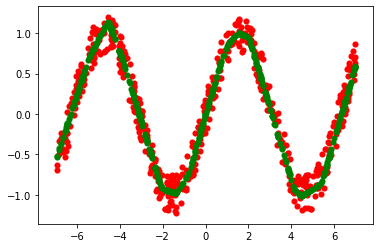

In [26]:
y_pred = model(x)
plt.scatter(x.detach().cpu().numpy(),y.detach().cpu().numpy(),color="red", linewidth=0.1)
plt.scatter(x.detach().cpu().numpy(), y_pred.detach().cpu().numpy(), color='green', linewidth=0.1)